<h1>1.Сгенеруйте набір даних, що містить не менше 6 змінних. Частину змінних згенеруйте за нормальний розподілом, частину - за будь-яким іншим розподілом. Кількість спостережень - 20.</h1>

In [196]:
import pandas as pd
import numpy as np

In [197]:
df = pd.DataFrame({
    "norm1": np.random.randn(20),
    "gamma": np.random.gamma(shape=2, scale=4, size=20),
    "norm2":np.random.normal(loc=10,scale=3,size=20),
    "uniform": np.random.uniform(0,20,size=20),
    "poisson": np.random.poisson(5, size=20),
    "gumbel":np.random.gumbel(5, 3, 20)
})

df

,norm1,gamma,norm2,uniform,poisson,gumbel
0,1.200582,10.273566,6.272980,0.187634,3,16.344470
1,-0.780340,4.028065,11.803667,3.380604,2,4.739595
2,-0.497572,15.712770,10.810967,16.508523,4,4.952377
3,2.266006,9.037118,12.421866,11.189326,4,15.806351
4,-0.527125,12.353841,12.056284,9.187467,5,7.531597
5,0.748841,11.977293,9.172688,12.884901,1,2.675509
6,0.648218,5.259375,10.038983,2.260715,5,6.800665
7,-1.038507,0.461275,6.581614,4.353720,7,4.645521
8,-0.633785,1.446896,6.445453,14.534111,7,1.930574
9,0.822257,5.557128,3.428103,4.401385,3,7.979084


<h1>2.Створіть функцію, що реалізує критерій Шапіро-Уілка та застосуйте її до кожної змінної набору данних. Детальний опис роботи критерію та приклад його розрахунку: https://pdfs.semanticscholar.org/e4a7/42a4f0585b4e4069726f6628f4d4285a0827.pdf</h1>

In [198]:
n = int(df.shape[0])
a=[0.4734, 0.3211, 0.2565, 0.2085, 0.1686, 0.1334, 0.1013, 0.0711, 0.0422, 0.0140]

def myFunction(data):
    if n % 2 == 0:
        k = int(n/2)
    else:
        k = int((n-1)/2)
    
    mn = np.mean(data)
    nm2 = 0
    
    for i in range(n):
        nm2 = nm2 + (data[i] - mn)**2
        
    b = 0
    for i in range (k):
        b += a[i] * (data[n-i-1] - data[i])
        
    w = (b**2)/nm2
    return w

In [199]:
myFunction(df["norm1"])

0.01496464196222751

<h1>3. Сгенеруйте пусту таблицю, в якій кількість рядків - це кількість змінних + 1. Кількість стовбчиків - 3. Назва стовпчиків - Variable, Statistics, Distribution. Шаблон таблиці: https://drive.google.com/file/d/1gRNsk9UDhl_6GGkJ04q0cBWBgsJvTgI4/view?usp=sharing</h1>

In [200]:
names = ["Variable", "Statistics", "Distribution"]
table = pd.DataFrame(columns = names)
table

,Variable,Statistics,Distribution


<h1>4. Занести в стовпчик Variable назви змінних.</h1>

In [201]:
table["Variable"] = df.keys()
table

,Variable,Statistics,Distribution
0,norm1,NaN,NaN
1,gamma,NaN,NaN
2,norm2,NaN,NaN
3,uniform,NaN,NaN
4,poisson,NaN,NaN
5,gumbel,NaN,NaN


<h1>5. Занести в стовпчик Distribution результати роботи криетрію Шапіро-Уілка. Для змінних, які розподілені за нормальним законом вносити "normal", в протилежному вигляді - "non-normal".</h1>

In [202]:
table["Distribution"] = ['normal' if 'norm' in i else 'non-normal' for i in table['Variable']]
table

,Variable,Statistics,Distribution
0,norm1,NaN,normal
1,gamma,NaN,non-normal
2,norm2,NaN,normal
3,uniform,NaN,non-normal
4,poisson,NaN,non-normal
5,gumbel,NaN,non-normal


<h1>6. Розрахувати для всіх змінних, що розподілені за нормальним законом розрахувати середне значення та стандартне відхилення. Записати в таблицю. Форма запису: Середнє [стандартне відхилення].</h1>

In [203]:
for i in range(table.shape[0]):
    if 'norm' in table["Variable"][i]:
        table['Statistics'][i] = f'{df[table["Variable"][i]].mean()} {[df[table["Variable"][i]].std()]}'
table

,Variable,Statistics,Distribution
0,norm1,0.3005785849424584 [1.0472075972080306],normal
1,gamma,NaN,non-normal
2,norm2,9.809094142059715 [3.3140006646029825],normal
3,uniform,NaN,non-normal
4,poisson,NaN,non-normal
5,gumbel,NaN,non-normal


<h1>7. Розрахувати для всіх змінних, що розподілені за розподілом відсутнім від нормального розрахувати медіану та інтерквартильний розмах. Записати в таблицю. Форма запису: Медіана [25%; 75%].</h1>

In [204]:
for i in range (table.shape[0]):
    cur = table["Variable"][i]
    if 'norm' not in cur:
        table["Statistics"][i] =f'{df[cur].median()}[{df[cur].quantile(0.25)} {df[cur].quantile(0.75)}]'

table

,Variable,Statistics,Distribution
0,norm1,0.3005785849424584 [1.0472075972080306],normal
1,gamma,7.696215535835526[4.95154757794382 12.46280976...,non-normal
2,norm2,9.809094142059715 [3.3140006646029825],normal
3,uniform,7.61601638701874[3.573849003401634 13.14609201...,non-normal
4,poisson,5.0[3.75 5.25],non-normal
5,gumbel,5.762406299450978[4.255962561123218 7.64346853...,non-normal


<h1>8. Зберегти таблицю в пдф форматі</h1>

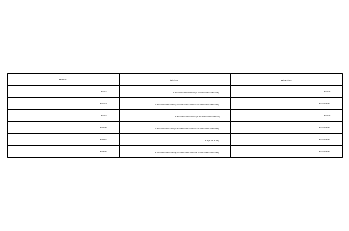

In [208]:
import matplotlib.backends.backend_pdf
import matplotlib.pyplot as plt
fig = plt.figure()
ax=fig.add_subplot(111)

cell_text = []
for row in range(len(table)):
    cell_text.append(table.iloc[row])

ax.table(cellText=cell_text, colLabels=table.columns, loc='center')
ax.axis('off')

pdf = matplotlib.backends.backend_pdf.PdfPages("table.pdf")
pdf.savefig(fig)
pdf.close()
